# Working with Programs

In Brush, a *Program* is an executable data structure. 
You may think of it as a *model* or a *function* mapping feature inputs to data labels. 
We call them programs because that's what they are: executable data structures,  
and that is what they are called in the genetic algorithm literature, to distinguish them from optimizing bits or strings. 

The Brush Program class operates similarly to a [sklearn](scikit-learn.org) estimator: it has `fit` and `predict` methods that are called in during training or inference, respectively. 


## Types of Programs 

There are four fundamental "types" of Brush programs:

- **Regressors**: map inputs to a continous endpoint 
- **Binary Classifiers**: map inputs to a binary endpoint, as well as a continuous value in $[0, 1]$  
- **Multi-class Classifiers**: map inputs to a category
    - Under development
- **Representors**: map inputs to a lower dimensional space. 
    - Under development

## Representation 

Internally, the programs are represented as syntax trees. 
We use the [tree.hh tree class](https://github.com/kpeeters/tree.hh) which gives trees an STL-like feel. 



## Generation

We generate random programs using Sean Luke's PTC2 algorithm.  


## Evaluation

TODO




## Visualizing Programs

Programs in Brush are symbolic tree structures, and can be viewed in a few ways: 


1. As a string using `get_model()`
2. As a string-like tree using `get_model("tree")`
2. As a graph using `graphviz` and `get_model("dot")`. 

Let's look at a regresion example.

In [1]:
import pandas as pd
from brush import BrushRegressor
from pmlb import fetch_data

# load data
df = pd.read_csv('../examples/datasets/d_enc.csv')
X = df.drop(columns='label')
y = df['label']



In [2]:
# import and make a regressor
est = BrushRegressor(
    functions=['SplitBest','Add','Mul','Sin','Cos','Exp','Logabs']
)

# use like you would a sklearn regressor
est.fit(X,y)
y_pred = est.predict(X)
print('score:', est.score(X,y))

/home/bill/mambaforge/envs/brush/lib/python3.11/site-packages/deap/tools/emo.py:139: RuntimeWarning: invalid value encountered in scalar divide
  distances[cur[1]] += (next[0][i] - prev[0][i]) / norm
/home/bill/mambaforge/envs/brush/lib/python3.11/site-packages/deap/tools/emo.py:139: RuntimeWarning: invalid value encountered in scalar subtract
  distances[cur[1]] += (next[0][i] - prev[0][i]) / norm
/home/bill/projects/brush/src/brush/estimator.py:251: RuntimeWarning: overflow encountered in square
  np.sum((data.y- ind.prg.predict(data))**2),
/home/bill/mambaforge/envs/brush/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


best model: Add(10.57*x6,If(x0>0.75,Add(8.50*x6,If(x0>0.81,26.02,Add(-9.31*x4,127.74*x0))),Add(Add(13.60*x4,0.11*x2),-0.09*x1)))


### String

Now that we have trained a model, `est.best_estimator_` contains our symbolic model. 
We can view it as a string:

In [4]:
print(est.best_estimator_.get_model())

Add(10.57*x6,If(x0>0.75,Add(8.50*x6,If(x0>0.81,26.02,Add(-9.31*x4,127.74*x0))),Add(Add(13.60*x4,0.11*x2),-0.09*x1)))


### Quick Little Tree

Or, we can view it as a compact tree:

In [5]:
print(est.best_estimator_.get_model("tree"))

Add
|-10.57*x6
|-SplitBest
|  |-Add
|    |-8.50*x6
|    |-SplitBest
|    |  |-26.02
|    |  |-Add
|    |  |  |--9.31*x4
|    |  |  |-127.74*x0
|  |-Add
|  |  |-Add
|  |    |-13.60*x4
|  |    |-0.11*x2
|  |  |--0.09*x1


### GraphViz

If we are feeling fancy 🎩, we can also view it as a graph in dot format. 
Let's import graphviz and make a nicer plot.

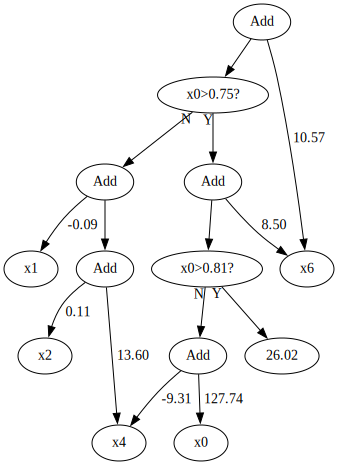

In [6]:
import graphviz

model = est.best_estimator_.get_model("dot")
graphviz.Source(model)

The `model` variable is now a little program in the [dot language](https://graphviz.org/docs/layouts/dot/), which we can inspect directly. 

In [9]:
print(model)

digraph G {
"5625d27dfb10" [label="Add"];
"5625d27dfb10" -> "x6" [label="10.57"];
"5625d27dfb10" -> "5625d1de0610" [label=""];
"x6" [label="x6"];
"5625d1de0610" [label="x0>0.75?"];
"5625d1de0610" -> "5625d3c02820" [headlabel="",taillabel="Y"];
"5625d1de0610" -> "5625d1ddc200" [headlabel="",taillabel="N"];
"5625d3c02820" [label="Add"];
"5625d3c02820" -> "x6" [label="8.50"];
"5625d3c02820" -> "5625d27cb4a0" [label=""];
"x6" [label="x6"];
"5625d27cb4a0" [label="x0>0.81?"];
"5625d27cb4a0" -> "5625d1c92dc0" [headlabel="",taillabel="Y"];
"5625d27cb4a0" -> "5625d2515750" [headlabel="",taillabel="N"];
"5625d1c92dc0" [label="26.02"];
"5625d2515750" [label="Add"];
"5625d2515750" -> "x4" [label="-9.31"];
"5625d2515750" -> "x0" [label="127.74"];
"x4" [label="x4"];
"x0" [label="x0"];
"5625d1ddc200" [label="Add"];
"5625d1ddc200" -> "5625d1d1bc10" [label=""];
"5625d1ddc200" -> "x1" [label="-0.09"];
"5625d1d1bc10" [label="Add"];
"5625d1d1bc10" -> "x4" [label="13.60"];
"5625d1d1bc10" -> "x2" [label="0.

### Tweaking Graphs

The [dot manual](https://graphviz.org/docs/layouts/dot/) has lots of options for tweaking the graphs. 
You can do this by manually editing `model`, but brush also provides a function, `get_dot_model()`, to which you can pass additional arguments to dot. 

For example, let's view the graph from Left-to-Right: 

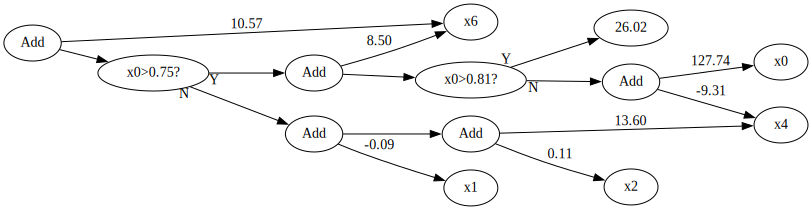

In [11]:
model = est.best_estimator_.get_dot_model("rankdir=LR;")
graphviz.Source(model)